In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import pandas as pd
import numpy as np
from predict import train_test_split, create_sequences
from sklearn.preprocessing import MinMaxScaler

TRAIN_RATIO = 0.8
TIMESTEP = 60

In [3]:
df = pd.read_csv('data/yf_daily/AAPL.csv')
df = df[['Close']]
X_sc = MinMaxScaler()
scaled_X = X_sc.fit_transform(df)

y_sc = MinMaxScaler()
scaled_y = y_sc.fit_transform(df[['Close']])

In [4]:
X, y = create_sequences(scaled_X, scaled_y, TIMESTEP)
X_train, y_train, X_test, y_test = train_test_split(X, y, TRAIN_RATIO)

In [5]:
def create_model(input_shape):
    
    model = Sequential()
    model.add(LSTM(units=50, input_shape=input_shape, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.005),loss='mean_squared_error')
        
    return model

In [6]:
model = create_model((X_train.shape[1], X_train.shape[2]))
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10

271/271 [==============================] - 7s 17ms/step - loss: 3.7945e-05
Epoch 2/10
271/271 [==============================] - 4s 16ms/step - loss: 1.8247e-06
Epoch 3/10
271/271 [==============================] - 4s 16ms/step - loss: 2.0038e-06
Epoch 4/10
271/271 [==============================] - 4s 16ms/step - loss: 1.8670e-06
Epoch 5/10
271/271 [==============================] - 5s 17ms/step - loss: 1.6047e-06
Epoch 6/10
271/271 [==============================] - 5s 17ms/step - loss: 1.7203e-06
Epoch 7/10
271/271 [==============================] - 5s 17ms/step - loss: 1.8363e-06
Epoch 8/10
271/271 [==============================] - 5s 17ms/step - loss: 1.3156e-06
Epoch 9/10
271/271 [==============================] - 5s 17ms/step - loss: 1.1699e-06
Epoch 10/10
271/271 [==============================] - 5s 17ms/step - loss: 1.7403e-06


In [7]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

68/68 [==============================] - 1s 8ms/step - loss: 1.9764e-04
Test Loss: 0.0001976393541553989


In [8]:
scaled_test_predictions = model.predict(X_test)
test_predictions = y_sc.inverse_transform(scaled_test_predictions)

test_targets = y_sc.inverse_transform(y_test)

68/68 [==============================] - 1s 8ms/step


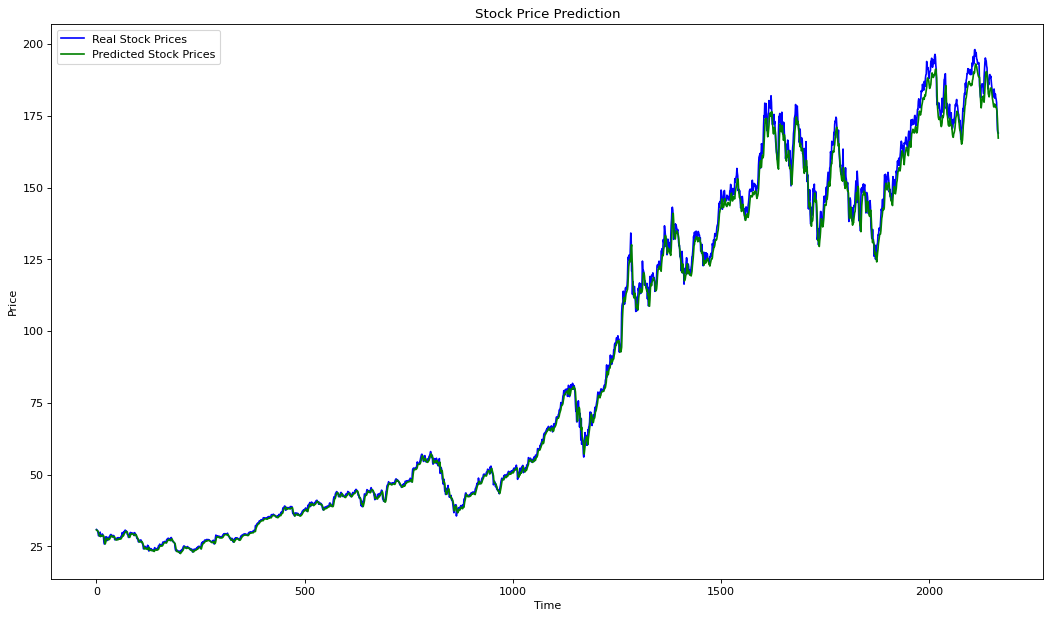

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9), dpi=80)
plt.plot(test_targets, color = 'blue', label = 'Real Stock Prices')
plt.plot(test_predictions, color = 'green', label = 'Predicted Stock Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()